In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 16.1 MB/s eta 0:00:00


Model załadowano pomyślnie!


Label(value='Prześlij obraz do predykcji:')

FileUpload(value={}, accept='image/*', description='Upload')

Przetwarzanie obrazu...

image 1/1 /content/uploaded_image_1737310907.jpg: 640x640 1 Potato leaf early blight, 439.7ms
Speed: 11.8ms preprocess, 439.7ms inference, 34.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


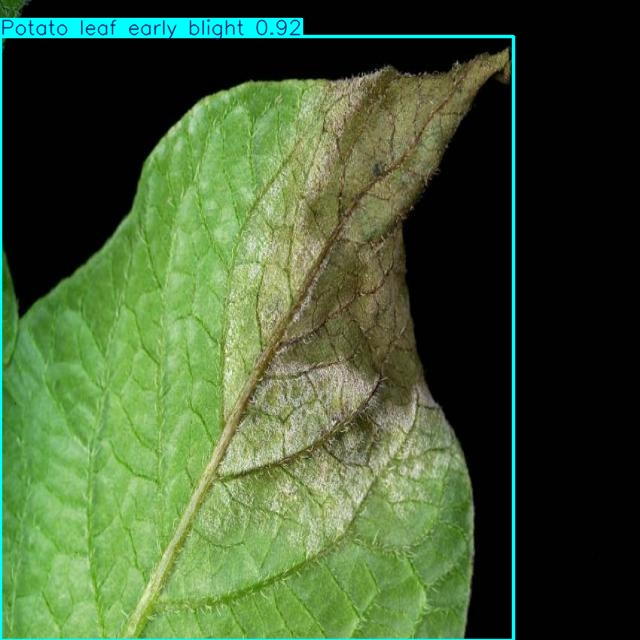

Wynik zapisano i wyświetlono.
Przetwarzanie obrazu...

image 1/1 /content/uploaded_image_1737310925.jpg: 640x640 1 Apple Scab Leaf, 1 Potato leaf early blight, 235.7ms
Speed: 5.3ms preprocess, 235.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


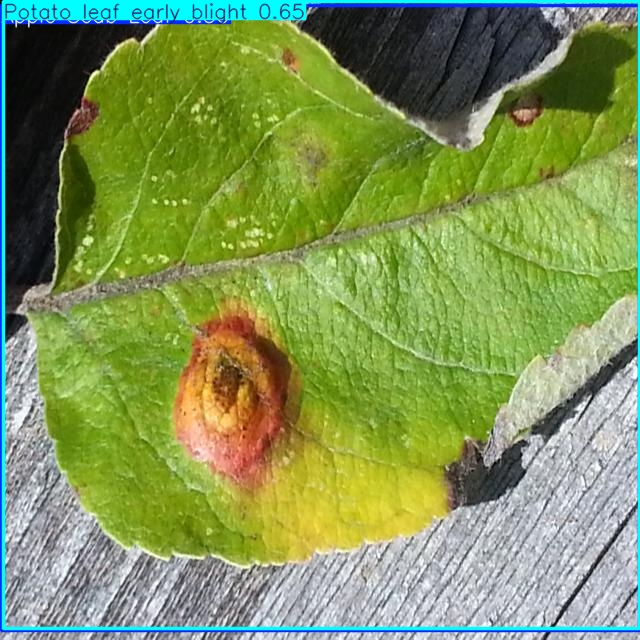

Wynik zapisano i wyświetlono.
Przetwarzanie obrazu...

image 1/1 /content/uploaded_image_1737310944.jpg: 640x640 1 Tomato Septoria leaf spot, 244.4ms
Speed: 4.0ms preprocess, 244.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


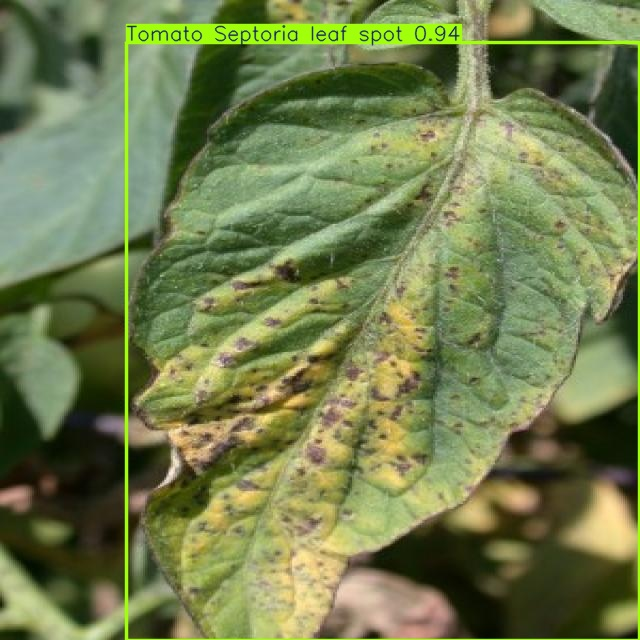

Wynik zapisano i wyświetlono.
Przetwarzanie obrazu...

image 1/1 /content/uploaded_image_1737310971.jpg: 640x640 1 Potato leaf early blight, 1 Tomato Early blight leaf, 288.6ms
Speed: 4.2ms preprocess, 288.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


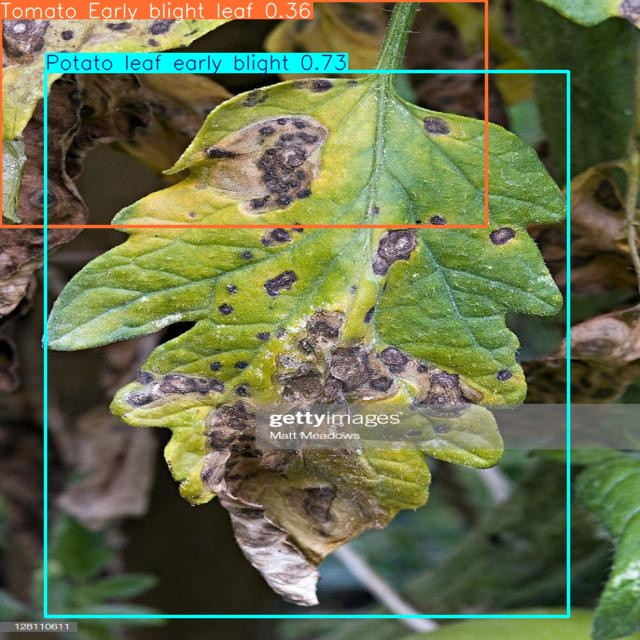

Wynik zapisano i wyświetlono.
Przetwarzanie obrazu...

image 1/1 /content/uploaded_image_1737310997.jpg: 640x640 1 Peach leaf, 226.5ms
Speed: 3.2ms preprocess, 226.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


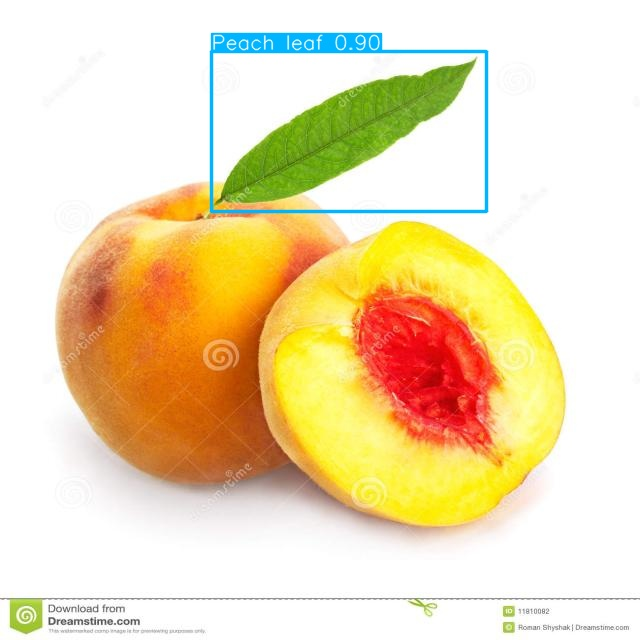

Wynik zapisano i wyświetlono.


In [2]:
from ultralytics import YOLO
from PIL import Image
import ipywidgets as widgets
from IPython.display import display, clear_output
import time
import os
import shutil

# Funkcja ładowania modelu z podanej ścieżki
def load_model(weights_path):
    """
    Ładowanie modelu z podanej ścieżki.
    """
    if os.path.exists(weights_path):
        print(f"Ładowanie modelu z wag: {weights_path}...")
        return YOLO(weights_path)
    else:
        print(f"Błąd: Nie znaleziono pliku wag: {weights_path}")
        return None

# Funkcja do predykcji i wyświetlania wyników
def process_image(model, image_path):
    """
    Funkcja do predykcji i wyświetlania wyników.
    """
    if model is None:
        print("Model nie został poprawnie załadowany.")
        return

    print("Przetwarzanie obrazu...")

    # Usuwanie starych wyników
    results_dir = "runs/detect/"
    if os.path.exists(results_dir):
        shutil.rmtree(results_dir)

    # Predykcja na obrazie
    results = model.predict(source=image_path, save=True)

    # Znajdź ścieżkę do zapisanego obrazu
    detect_folder = os.listdir("runs/detect")[-1]
    pred_path = f"runs/detect/{detect_folder}/{os.path.basename(image_path)}"

    # Wyświetl wynik
    try:
        display(Image.open(pred_path))
        print("Wynik zapisano i wyświetlono.")
    except FileNotFoundError:
        print(f"Nie znaleziono pliku: {pred_path}. Sprawdź poprawność ścieżki.")

# Funkcja do wczytywania modelu z uploadu lub podanej ścieżki
def get_model():
    """
    Funkcja do wyboru między podaniem ścieżki a przesłaniem pliku wag modelu.
    """
    # Tworzenie widgetów
    path_input = widgets.Text(
        description="Ścieżka:",
        placeholder="Wprowadź ścieżkę do pliku wag..."
    )
    path_button = widgets.Button(description="Załaduj z ścieżki")

    upload_label = widgets.Label("Lub prześlij plik wag modelu:")
    uploader = widgets.FileUpload(
        accept='.pt',  # Akceptuje pliki .pt
        multiple=False
    )

    # Callback dla podanej ścieżki
    def load_from_path(change):
        weights_path = path_input.value
        model = load_model(weights_path)
        if model:
            clear_output()
            print("Model załadowano pomyślnie!")
            upload_image_and_predict(model)

    # Callback dla przesłanego pliku
    def load_from_upload(change):
        if uploader.value:
            uploaded_file = next(iter(uploader.value.values()))
            weights_path = f"uploaded_weights_{int(time.time())}.pt"
            with open(weights_path, "wb") as f:
                f.write(uploaded_file['content'])
            model = load_model(weights_path)
            if model:
                clear_output()
                print("Model załadowano pomyślnie!")
                upload_image_and_predict(model)

    # Podpinanie callbacków
    path_button.on_click(load_from_path)
    uploader.observe(load_from_upload, names='value')

    # Wyświetlenie interfejsu
    display(widgets.Label("Podaj ścieżkę do pliku wag modelu:"))
    display(path_input, path_button)
    display(upload_label, uploader)

# Funkcja do wczytywania obrazu i predykcji
def upload_image_and_predict(model):
    """
    Funkcja do wczytywania obrazu i predykcji.
    """
    if model is None:
        print("Model nie został poprawnie załadowany. Nie można przetworzyć obrazu.")
        return

    uploader = widgets.FileUpload(
        accept='image/*',
        multiple=False
    )

    def on_upload(change):
        if uploader.value:
            unique_filename = f"uploaded_image_{int(time.time())}.jpg"
            with open(unique_filename, "wb") as f:
                f.write(next(iter(uploader.value.values()))['content'])
            process_image(model, unique_filename)

    uploader.observe(on_upload, names='value')
    display(widgets.Label("Prześlij obraz do predykcji:"))
    display(uploader)

# Główna funkcja systemu
def main():
    """
    Główna funkcja systemu.
    """
    clear_output()
    print("System wykrywania chorób roślin")
    get_model()

# Uruchomienie programu
main()
